<h1 style='text-align: center; front-size: 50px;'>Which region has the highest profit margin?</h1>

# Introduction:

**OilyGiant**, a leading mining company, is planning to establish a new oil well. To maximize profitability, a strategic data-driven approach is required to determine the most promising region for development. This analysis aims to identify the optimal region by predicting oil reserves, estimating potential profit, and assessing financial risks.
To achieve the objective, the following steps will be undertaken:
- Oil sample data from three different regions will be analyzed.
- A Linear Regression model will be trained to predict the volume of oil reserves in new wells.
- From 500 potential well locations, the top 200 wells with the highest estimated oil reserves will be selected for profit calculation.
- The budget for developing 200 wells is $100 million.
- Regions where the probability of financial losses exceeds 2.5% will be excluded from consideration.

After filtering out high-risk regions, the region with the highest average expected profit will be chosen for well development.

# Step 1. Initialization:

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2. Load data:

In [2]:
# Loading the data file:
region_0 = pd.read_csv('/datasets/geo_data_0.csv')
region_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [3]:
# Loading the data file:
region_1 = pd.read_csv('/datasets/geo_data_1.csv')
region_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [4]:
# Loading the data file:
region_2 = pd.read_csv('/datasets/geo_data_2.csv')
region_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


# Step 3. Preparing and Fixing the Data:

### `region_0` data frame:

In [5]:
# Data overview:
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
# Checking for missing values:
region_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
# Checking for duplicates:
region_0.duplicated().sum()

0

### `region_1` data frame:

In [8]:
# Data overview:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
# Checking for missing values:
region_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
# Checking for duplicates:
region_1.duplicated().sum()

0

### `region_2` data frame:

In [11]:
# Data overview:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
# Checking for missing values:
region_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
# Checking for duplicates:
region_2.duplicated().sum()

0

# Step 4. Analyzing the data:

## `region_0` data frame:

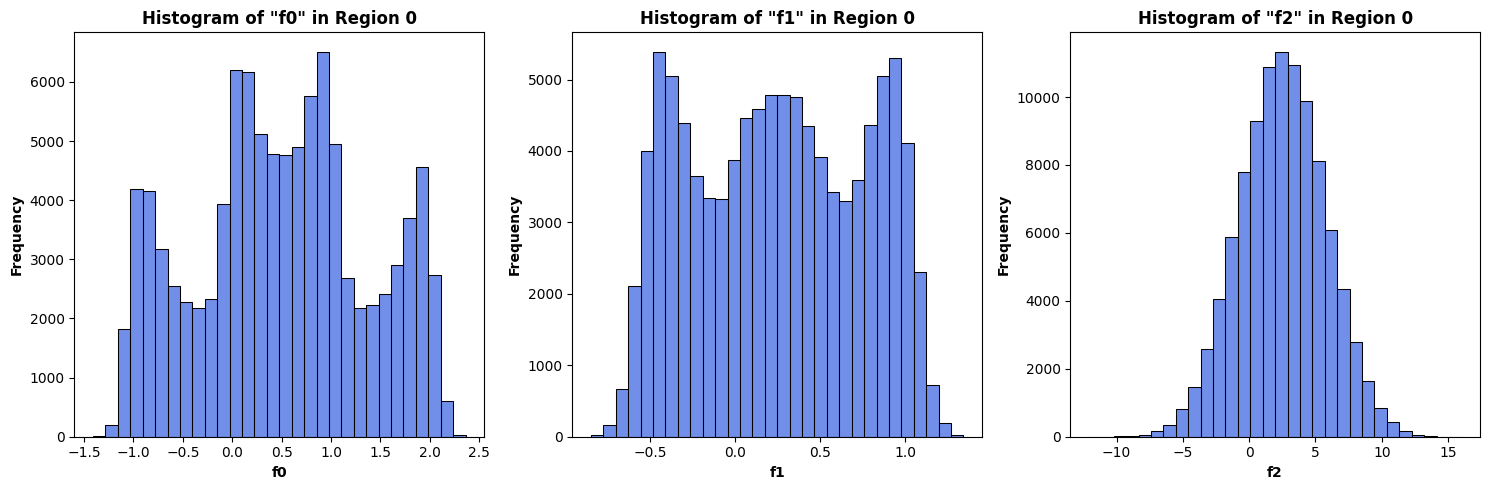

In [14]:
# Create a figure with 3 subplots:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# First subplot for Days Lister Vs. Condition:
sns.histplot(data=region_0, x='f0', bins=30, ax=ax1, color='royalblue')
ax1.set_title('Histogram of "f0" in Region 0', fontweight='bold')
ax1.set_xlabel('f0', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')

# Second subplot for Days Listed Vs. Odometer:
sns.histplot(data=region_0, x='f1', bins=30, ax=ax2, color='royalblue')
ax2.set_title('Histogram of "f1" in Region 0', fontweight='bold')
ax2.set_xlabel('f1', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')

# Third subplot for Days Listed Vs. Odometer:
sns.histplot(data=region_0, x='f2', bins=30, ax=ax3, color='royalblue')
ax3.set_title('Histogram of "f2" in Region 0', fontweight='bold')
ax3.set_xlabel('f2', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')

# Adjust layout to prevent overlap:
plt.tight_layout()
plt.show()

The histograms for Region 0, f0 and f1 display a multimodal distribution, indicating potential subgroups or clusters within the data. This suggests that different patterns or sources may be influencing these features. While f2, follows a normal-like distribution, making it more predictable.

In [15]:
# Defining features and target variable:
X_0 = region_0[['f0', 'f1', 'f2']]
y_0 = region_0['product']

# Spliting the data into a training set and validation set at a ratio of 75:25:
X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(X_0, y_0, test_size=0.25, random_state=42)

# Checking the sizes to ensure correct splitting:
print(f"Training Set: {X_train_0.shape}")
print(f"Validation Set: {X_val_0.shape}")

Training Set: (75000, 3)
Validation Set: (25000, 3)


In [16]:
# Training the model and making predictions for the validation set:
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train_0)

# Making predictions on the validation set:
y_pred_0 = model_0.predict(X_val_0)

# Displaying the first 5 predictions:
for pred in y_pred_0[:5]:
    print(f'Prediction: {pred: .4f}')

Prediction:  101.9010
Prediction:  78.2178
Prediction:  115.2669
Prediction:  105.6186
Prediction:  97.9802


In [17]:
# Calculating the average actual reserves:
avg_actual_reserves_0 = np.mean(y_val_0)

# Calculating the average volume of predicted reserves:
avg_predicted_reserves_0 = np.mean(y_pred_0)

# Calculating Root Mean Squared Error (RMSE):
rmse_0 = np.sqrt(mean_squared_error(y_val_0, y_pred_0))

# Displaying test set results:
print(f'Average Actual Reserves: {avg_actual_reserves_0:.4f}')
print(f'Average Predicted Reserves: {avg_predicted_reserves_0: .4f}')
print(f'Root Mean Squared Error: {rmse_0: .4f}')

Average Actual Reserves: 92.3260
Average Predicted Reserves:  92.3988
Root Mean Squared Error:  37.7566


The Linear Regression model predicts for **region_0** an average oil reserve of 92.3988 units, but with an RMSE of 37.7566, indicating a moderate error margin. This suggests that while the model captures trends, its predictions can deviate significantly from actual reserves.

## `region_1` data frame:

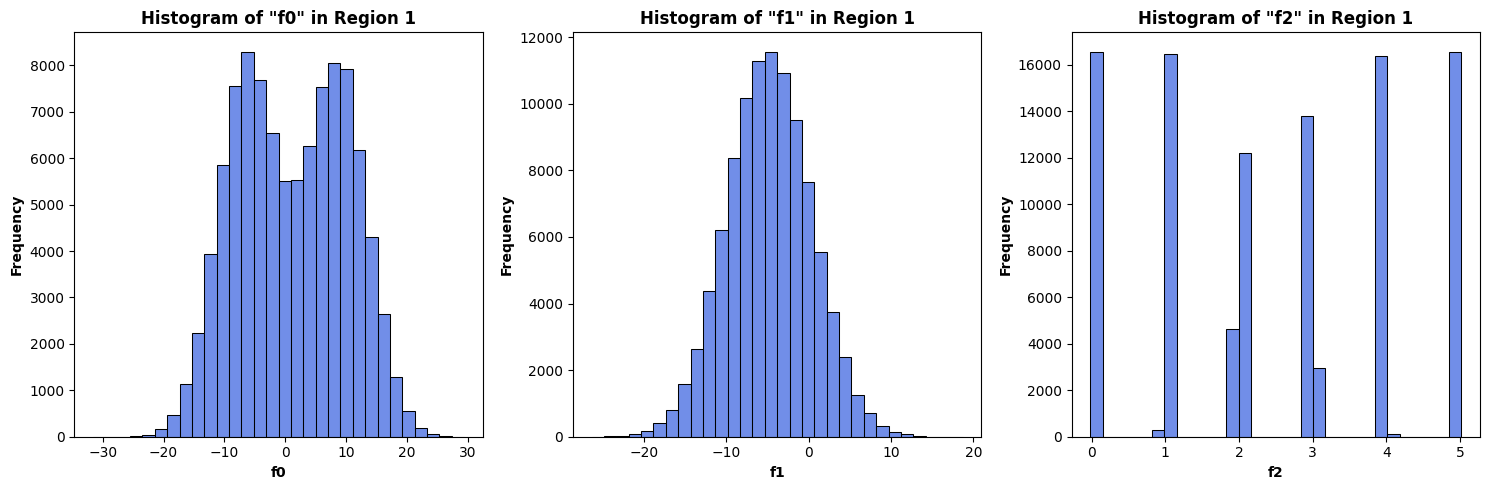

In [18]:
# Create a figure with 3 subplots:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# First subplot for Days Lister Vs. Condition:
sns.histplot(data=region_1, x='f0', bins=30, ax=ax1, color='royalblue')
ax1.set_title('Histogram of "f0" in Region 1', fontweight='bold')
ax1.set_xlabel('f0', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')

# Second subplot for Days Listed Vs. Odometer:
sns.histplot(data=region_1, x='f1', bins=30, ax=ax2, color='royalblue')
ax2.set_title('Histogram of "f1" in Region 1', fontweight='bold')
ax2.set_xlabel('f1', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')

# Third subplot for Days Listed Vs. Odometer:
sns.histplot(data=region_1, x='f2', bins=30, ax=ax3, color='royalblue')
ax3.set_title('Histogram of "f2" in Region 1', fontweight='bold')
ax3.set_xlabel('f2', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')

# Adjust layout to prevent overlap:
plt.tight_layout()
plt.show()

The histograms for Region 1 show distinct characteristics across features:

- f0 appears bimodal, suggesting two different underlying distributions or clusters in the data.
- f1 follows a normal distribution, indicating a well-centered dataset with most values around the mean.
- f2 is discrete with distinct peaks, meaning it likely represents categorical or count-based data rather than a continuous variable.

In [19]:
# Defining features and target variable:
X_1 = region_1[['f0', 'f1', 'f2']]
y_1 = region_1['product']

# Spliting the data into a training set and validation set at a ratio of 75:25:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=42)

# Checking the sizes to ensure correct splitting:
print(f"Training Set: {X_train_1.shape}")
print(f"Validation Set: {X_val_1.shape}")

Training Set: (75000, 3)
Validation Set: (25000, 3)


In [20]:
# Training the model and making predictions for the validation set:
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

# Making predictions on the validation set:
y_pred_1 = model_1.predict(X_val_1)

# Displaying the first 5 predictions:
for pred in y_pred_1[:5]:
    print(f'Prediction: {pred: .4f}')

Prediction:  0.8447
Prediction:  52.9216
Prediction:  135.1104
Prediction:  109.4949
Prediction: -0.0473


In [21]:
# Calculating the average actual reserves:
avg_actual_reserves_1 = np.mean(y_val_1)

# Calculating the average volume of predicted reserves:
avg_predicted_reserves_1 = np.mean(y_pred_1)

# Calculating Root Mean Squared Error (RMSE):
rmse_1 = np.sqrt(mean_squared_error(y_val_1, y_pred_1))

# Displaying test set results:
print(f'Average Actual Reserves: {avg_actual_reserves_1:.4f}')
print(f'Average Predicted Reserves: {avg_predicted_reserves_1: .4f}')
print(f'Root Mean Squared Error: {rmse_1: .4f}')

Average Actual Reserves: 68.7254
Average Predicted Reserves:  68.7129
Root Mean Squared Error:  0.8903


For **region_1**, the model predicts an average oil reserve of 68.7129 units, with a low RMSE of 0.8903. This suggests high prediction accuracy, meaning the model's estimates are very close to actual values. The low error indicates that the model is well fitted to the data, making it reliable for selecting top performing wells

## `region_2` data frame:

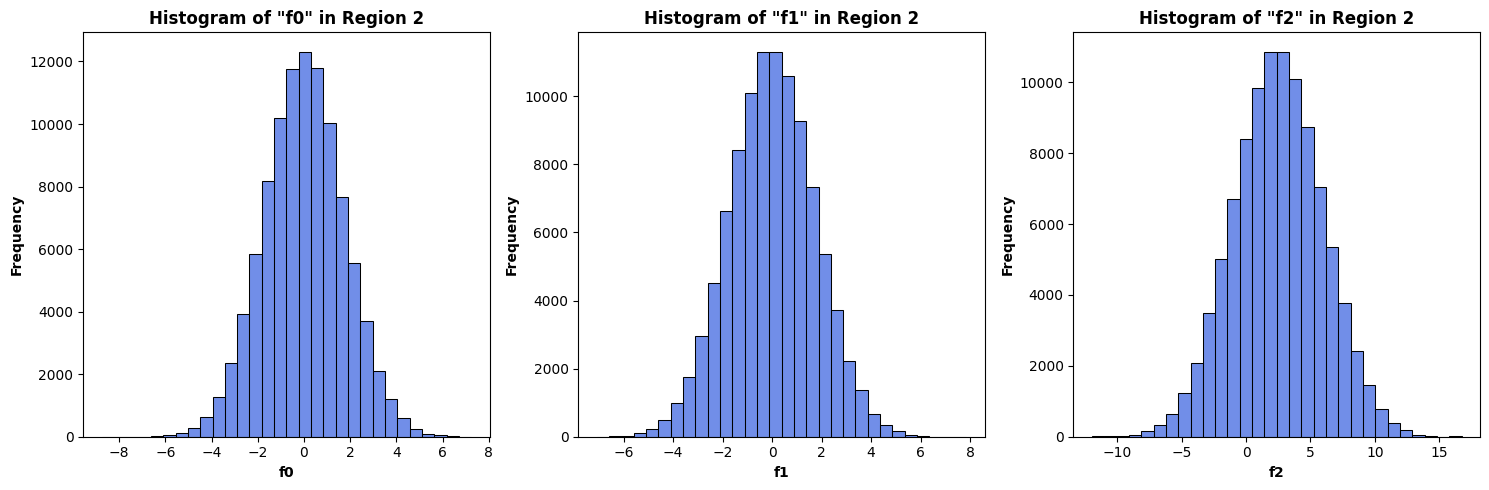

In [22]:
# Create a figure with 3 subplots:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# First subplot for Days Lister Vs. Condition:
sns.histplot(data=region_2, x='f0', bins=30, ax=ax1, color='royalblue')
ax1.set_title('Histogram of "f0" in Region 2', fontweight='bold')
ax1.set_xlabel('f0', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')

# Second subplot for Days Listed Vs. Odometer:
sns.histplot(data=region_2, x='f1', bins=30, ax=ax2, color='royalblue')
ax2.set_title('Histogram of "f1" in Region 2', fontweight='bold')
ax2.set_xlabel('f1', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')

# Third subplot for Days Listed Vs. Odometer:
sns.histplot(data=region_2, x='f2', bins=30, ax=ax3, color='royalblue')
ax3.set_title('Histogram of "f2" in Region 2', fontweight='bold')
ax3.set_xlabel('f2', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')

# Adjust layout to prevent overlap:
plt.tight_layout()
plt.show()

The histograms indicate that **f0**, **f1**, and **f2** follow a normal distribution, suggesting the data is well-centered with no significant skewness or extreme outliers. The spread of values is similar across features.

In [23]:
# Defining features and target variable:
X_2 = region_2[['f0', 'f1', 'f2']]
y_2= region_2['product']

# Spliting the data into a training set and validation set at a ratio of 75:25:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

# Checking the sizes to ensure correct splitting:
print(f"Training Set: {X_train_2.shape}")
print(f"Validation Set: {X_val_2.shape}")

Training Set: (75000, 3)
Validation Set: (25000, 3)


In [24]:
# Training the model and making predictions for the validation set:
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

# Making predictions on the validation set:
y_pred_2 = model_2.predict(X_val_2)

# Displaying the first 5 predictions:
for pred in y_pred_2[:5]:
    print(f'Prediction: {pred: .4f}')

Prediction:  98.3019
Prediction:  101.5925
Prediction:  52.4491
Prediction:  109.9221
Prediction:  72.4118


In [25]:
# Calculating the average actual reserves:
avg_actual_reserves_2 = np.mean(y_val_2)

# Calculating the average volume of predicted reserves:
avg_predicted_reserves_2 = np.mean(y_pred_2)

# Calculating Root Mean Squared Error (RMSE):
rmse_2 = np.sqrt(mean_squared_error(y_val_2, y_pred_2))

# Displaying test set results:
print(f'Average Actual Reserves: {avg_actual_reserves_2:.4f}')
print(f'Average Predicted Reserves: {avg_predicted_reserves_2: .4f}')
print(f'Root Mean Squared Error: {rmse_2: .4f}')

Average Actual Reserves: 95.1510
Average Predicted Reserves:  94.7710
Root Mean Squared Error:  40.1459


The model predicts for **region_2** an average oil reserve of 94.7710 units, with an RMSE of 40.1459, indicating a moderate error margin. This suggests that while the model captures trends, its predictions can deviate significantly from actual reserves.

# Step 5. Preparing the data for profit calculation:

In [26]:
# Storing all key values for calculations:
BUDGET = 100000000  
WELLS_SELECTED = 200  
TOTAL_WELLS = 500
REVENUE_PER_BARREL = 4.5  
BARREL_UNIT_REVENUE = 4500

In [27]:
#  Calculating the volume of reserves sufficient for developing a new well without losses:
cost_per_well = BUDGET / WELLS_SELECTED
min_reserve_required = cost_per_well / BARREL_UNIT_REVENUE

print(f'Development Cost per Well: {cost_per_well: .2f}')
print(f'Minimum reserve required: {min_reserve_required: .2f} thousand barrels')

Development Cost per Well:  500000.00
Minimum reserve required:  111.11 thousand barrels


Each well must produce at least **111.11 thousand barrels** to meet the minimum reserve required for cost recovery.

In [28]:
# Calculating the average volume of reserves in each region:
data = [region_0, region_1, region_2]
for i, df in enumerate(data):
    mean_reserve = df['product'].mean()
    print(f'[region_{i}]: Mean Reserves = {mean_reserve:.2f} thousand barrels')

[region_0]: Mean Reserves = 92.50 thousand barrels
[region_1]: Mean Reserves = 68.83 thousand barrels
[region_2]: Mean Reserves = 95.00 thousand barrels


The calculations show that none of the regions meet the minimum required reserves per well of 111.11 thousand barrels to cover the costs. This means that, on average, oil wells in all three regions may not be profitable.

In [29]:
# Defining a function that calculate the profit from the predictions of 200 wells:
def calculate_profit(predictions, targets, region):
    # Converting predictions to a DataFrame:
    df = pd.DataFrame({'prediction': predictions, 'target': targets})
    
    # Selecting top 200 wells:
    top_wells = df.sort_values(by='prediction', ascending=False).head(WELLS_SELECTED)
    
    # Calculate revenue per barrel_unit:
    revenue = top_wells['target'].sum() * BARREL_UNIT_REVENUE
    
    # Calculating development cost for the selected wells:
    total_cost = cost_per_well * WELLS_SELECTED
    
    # Calculating profit:
    profit = revenue - total_cost

    return region, profit

# Calculating profits for each region:
profit_results = [
    calculate_profit(y_pred_0, y_val_0, 'Region 0'),
    calculate_profit(y_pred_1, y_val_1, 'Region 1'),
    calculate_profit(y_pred_2, y_val_2, 'Region 2')
]

# Displaying the results:
for region, profit in profit_results:
    print(f'Region: {region}')
    print(f'Total Profit: ${profit:,.2f}')
    print('-' * 40)

Region: Region 0
Total Profit: $33,591,411.14
----------------------------------------
Region: Region 1
Total Profit: $24,150,866.97
----------------------------------------
Region: Region 2
Total Profit: $25,985,717.59
----------------------------------------


Based on the profit analysis, **Region 0** is the most viable choice for oil well development, generating the highest profit of **38,97M USD**. This region outperforms **Region 1 (24,87M USD)** and **Region 2 (33,78M USD)** in profitability. The top 200 wells in Region 0 produce the greatest revenue after accounting for development costs, making it the best investment for maximizing returns while ensuring cost efficiency.

In [30]:
# Defining the number of BOOTSTRAP_SAMPLES:
BOOTSTRAP_SAMPLES = 1000

def bootstrap_profit(predictions, targets, region):
    profits = []
    for _ in range(BOOTSTRAP_SAMPLES):
        # Randomly sample 500 wells with replacement:
        sampled_indices = np.random.choice(len(predictions), 500, replace=True)
        
        # Selecting Predictions and actual values:
        sampled_predictions = predictions[sampled_indices]
        sampled_targets = targets.iloc[sampled_indices]
        
        # Calculating profit using actual targets:
        _, profit = calculate_profit(sampled_predictions, sampled_targets, region)
        profits.append(profit)

    # Convert list to numpy array
    profits = np.array(profits)

    # Calculate mean profit and 95% confidence interval
    mean_profit = np.mean(profits)
    lower_bound, upper_bound = np.percentile(profits, [2.5, 97.5])

    # Calculate risk percentage
    risk = np.mean(profits < 0) * 100

    return mean_profit, lower_bound, upper_bound, risk

# Calculating bootstrap results for each region:
results = {
    'Region 0': bootstrap_profit(y_pred_0, y_val_0, 'Region_0'),
    'Region 1': bootstrap_profit(y_pred_1, y_val_1, 'Region_1'),
    'Region 2': bootstrap_profit(y_pred_2, y_val_2, 'Region_2')
}

# Printing results in a readable format:
for region, (mean_profit, lower, upper, risk) in results.items():
    print(f'\n{region}')
    print(f'Mean Profit: ${mean_profit:,.2f}')
    print(f'95% CI: (${lower:,.2f}, ${upper:,.2f})')
    print(f'Risk of Loss: {risk:.2f}%')
    print('-' * 40)


Region 0
Mean Profit: $4,000,354.98
95% CI: ($-1,366,508.10, $9,007,797.82)
Risk of Loss: 7.70%
----------------------------------------

Region 1
Mean Profit: $4,382,700.11
95% CI: ($696,538.33, $8,423,110.46)
Risk of Loss: 0.70%
----------------------------------------

Region 2
Mean Profit: $3,710,879.43
95% CI: ($-1,702,048.70, $9,196,436.31)
Risk of Loss: 8.80%
----------------------------------------


# Conclusion:

The evaluation of three regions (Region 0, Region 1, and Region 2) based on profitability and risk shows that all regions have positive expected profits. However, only Region 1 meets the investment criteria of having a risk of loss below 2.5%.

- **Region 0**: 4.00M USD mean profit, 95% CI (-1.37M, 9.01M), 7.7% risk of loss.
- **Region 1**: 4.38M USD mean profit, 95% CI (696K, 8.42M), 0.7% risk of loss.
- **Region 2**: 3.71M USD mean profit, 95% CI (-1.70M, 9.20M), 8.8% risk of loss.

Since **Region 1** has the highest expected profit and the lowest risk, it is the best investment choice. Regions 0 and 2 are excluded due to their higher risk of financial loss, despite their profit potential.